# Final Year Project: Universal Portfolio Generated by Hilbert Matrix and Its Performance 

# Libraries

In [1]:
#Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Functions

### Mahalanobis Universal Portfolio function

In [2]:
def MUP(portfolio, ξ, CompanionMatrix, ratio):
    #Mahalanobis Universal Portfolio formula
    return portfolio + (ξ/(portfolio.dot(ratio)))*(CompanionMatrix.dot(ratio))

### Companion Matrix

In [3]:
#Function to calculate Companion Matrix from symmetric positive definite matrix
def calculate_c(e):
    row_sums = np.sum(e, axis=1)  
    column_sums = np.sum(e, axis=0)  
    total_sum = np.sum(e)  
    
    # Compute c_ij for each element in e
    c = e - (np.outer(row_sums, column_sums) / total_sum)
    
    return c

#Symmetric positive definite matrix for this FYP project
HilbertMatrix = np.array([[1,1/2,1/3],[1/2,1/3,1/4],[1/3,1/4,1/5]])

#Companion Matrix for this FYP project
CompanionMatrix = calculate_c(HilbertMatrix)

### Universal Portfolio function

In [4]:
#Create Mahalanobis Universal Portfolio Array at ξ-value
def Portfolio(ξ,ratio):
    b1 = np.array([1/3, 1/3, 1/3]) 
    b = b1
    i = 0
    for day in ratio:
        if i == 0:
            b = np.vstack((b, MUP(b, ξ, CompanionMatrix, ratio[i])))
        else:
            b = np.vstack((b, MUP(b[i], ξ, CompanionMatrix, ratio[i])))
        i+=1
    return b

### Portfolio Validity function

In [5]:
#Check whether a portfolio is valid or not
def V(b):
    
    valid = True
    i = 0
    
    while i < len(b):
        j = 0
        sum = 0
        
        while j < len(b[i]):
            
            #check whether a value of portfolio is negative
            if b[i][j] < 0:
                valid = False
                break
            sum += b[i][j] 
            j += 1

        #check whether the sum of portfolio is not equal to 1
        if sum > 1.0001 or sum < 0.9999 or valid == False:
            valid = False
            break
        i += 1

    if valid == False:
        return False
    else:
        return True

### Wealth Function for Mahalanobis Universal Portfolio

In [6]:
#Calculate wealth from a Mahalabis Universal Portfolio array at ξ-value
def Wealth_MUP(ξ,ratio):
    Wealth = 1
    b = Portfolio(ξ,ratio)
    C = CompanionMatrix
    i = 0
    
    for day in ratio:
        Wealth *= b[i].dot(ratio[i])
        i += 1   
    
    #Function return 0 if portfolio is invalid
    if V(Portfolio(ξ,ratio)) == True:
        return Wealth
    else:
        return 0

### Best Constant Rebalanced Portfolio Function

In [7]:
def BCRP(ratioSet):
    
    #Generate a valid portfolio array to find Best Constant Rebalanced Portfolio
    interval = 0.01
    b1 = np.arange(0, 1.01, interval)
    b2 = np.arange(0, 1.01, interval)
    b3 = np.arange(0, 1.01, interval)

    i = 0
    while i < len(b1):
        j = 0
        while j < len(b2):
            k = 0
            while k < len(b3):
                sum = b1[i] + b2[j] + b3[k]
                if sum < 1.0001 and sum > 0.9999:
                    if i == 0 and j == 0 and k == 100:
                        b_bcrp = np.array([b1[i], b2[j], b3[k]])
                    else:
                        b_bcrp = np.vstack((b_bcrp, np.array([b1[i], b2[j], b3[k]])))
                k += 1
            j += 1
        i += 1
    
    #Search for the Best Constant Rebalanced Portfolio
    bcrp = np.array([])
    W = 0
    for portfolio in b_bcrp:
        if W < Wealth_CRP(portfolio, ratioSet):
            W = Wealth_CRP(portfolio, ratioSet)
            bcrp = portfolio
    
    return bcrp

### Wealth Function for  Constant Rebalanced Portfolio

In [8]:
#Calculate wealth from a Constant Rebalanced Portfolio
def Wealth_CRP(portfolio, ratio):
    Wealth = 1
    i = 0
    
    for day in ratio:
        Wealth *= portfolio.dot(ratio[i])
        i += 1
    
    return Wealth

### Wealth function for Buy and Hold Strategy

In [9]:
#Calculate wealth from Buy-and-Hold Strategy 
def BHS(StockPrice):
    return (StockPrice[len(StockPrice) - 1] / StockPrice[0])[0]

### Wealth Percentage function

In [10]:
#Calculate wealth percentage
def percentage(wealth):
    return (wealth - 1) * 100

# Stock Price Data

### Set A

In [11]:
OpenCIMB = pd.read_csv('datasets/CIMB.csv', usecols=['Open']).to_numpy()
CloseCIMB = pd.read_csv('datasets/CIMB.csv', usecols=['Close']).to_numpy()
ratioCIMB = np.divide(CloseCIMB, OpenCIMB)

OpenPetron = pd.read_csv('datasets/Petron.csv', usecols=['Open']).to_numpy()
ClosePetron = pd.read_csv('datasets/Petron.csv', usecols=['Close']).to_numpy()
ratioPetron = np.divide(ClosePetron, OpenPetron)

OpenYTL = pd.read_csv('datasets/YTL.csv', usecols=['Open']).to_numpy()
CloseYTL = pd.read_csv('datasets/YTL.csv', usecols=['Close']).to_numpy()
ratioYTL = np.divide(CloseYTL, OpenYTL)

#Daily Price Relative array for Set A
ratioSetA = np.concatenate([ratioCIMB, ratioPetron, ratioYTL], axis=1)

### Stock Price Movement for Set A

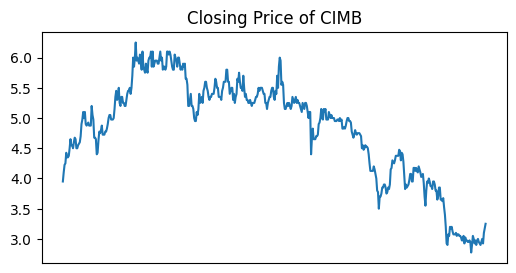

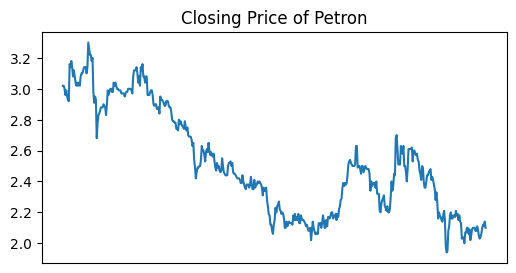

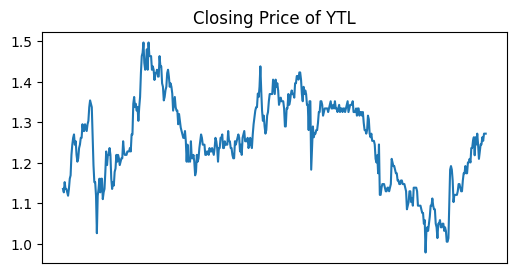

In [12]:
Days = np.arange(0, 500, 1)

fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of CIMB')
plt.plot(Days, CloseCIMB)
ax.set_xticks([])
fig.set_size_inches(6, 3)
plt.show()

fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Petron')
plt.plot(Days, ClosePetron)
fig.set_size_inches(6, 3)
plt.show()

fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of YTL')
plt.plot(Days, CloseYTL)
fig.set_size_inches(6, 3)
plt.show()

### Set B

In [13]:
OpenPublicBank = pd.read_csv('datasets/PublicBank.csv', usecols=['Open']).to_numpy()
ClosePublicBank = pd.read_csv('datasets/PublicBank.csv', usecols=['Close']).to_numpy()
ratioPublicBank = np.divide(ClosePublicBank, OpenPublicBank)

OpenShell = pd.read_csv('datasets/SHELL.csv', usecols=['Open']).to_numpy()
CloseShell = pd.read_csv('datasets/SHELL.csv', usecols=['Close']).to_numpy()
ratioShell = np.divide(CloseShell, OpenShell)

OpenTopGlove = pd.read_csv('datasets/TopGlove.csv', usecols=['Open']).to_numpy()
CloseTopGlove = pd.read_csv('datasets/TopGlove.csv', usecols=['Close']).to_numpy()
ratioTopGlove = np.divide(CloseTopGlove, OpenTopGlove)

#Daily Price Relative array for Set B
ratioSetB = np.concatenate([ratioPublicBank, ratioShell, ratioTopGlove], axis=1)

### Stock Price Movement for Set B

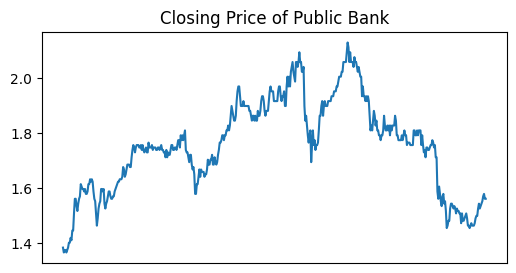

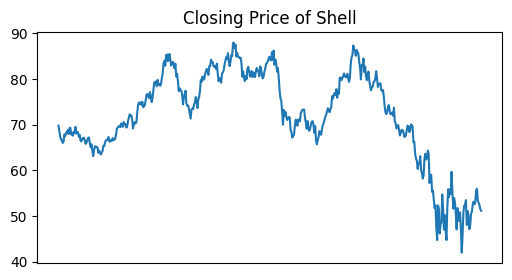

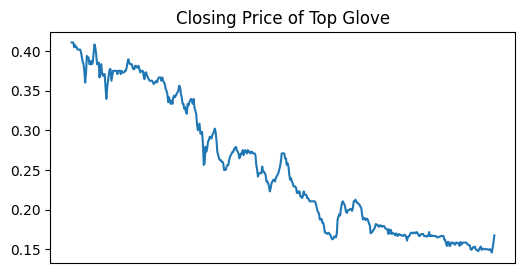

In [14]:
fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Public Bank')
plt.plot(Days, ClosePublicBank)
fig.set_size_inches(6, 3)
plt.show()

fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Shell')
plt.plot(Days, CloseShell)
fig.set_size_inches(6, 3)
plt.show()

fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Top Glove')
plt.plot(Days, CloseTopGlove)
fig.set_size_inches(6, 3)
plt.show()

### Set C

In [15]:
OpenMaybank = pd.read_csv('datasets/Maybank.csv', usecols=['Open']).to_numpy()
CloseMaybank = pd.read_csv('datasets/Maybank.csv', usecols=['Close']).to_numpy()
ratioMaybank = np.divide(CloseMaybank, OpenMaybank)

OpenPetronas = pd.read_csv('datasets/Petronas.csv', usecols=['Open']).to_numpy()
ClosePetronas = pd.read_csv('datasets/Petronas.csv', usecols=['Close']).to_numpy()
ratioPetronas = np.divide(ClosePetronas, OpenPetronas)

OpenSimeDarby = pd.read_csv('datasets/SimeDarby.csv', usecols=['Open']).to_numpy()
CloseSimeDarby = pd.read_csv('datasets/SimeDarby.csv', usecols=['Close']).to_numpy()
ratioSimeDarby = np.divide(CloseSimeDarby, OpenSimeDarby)

#Daily Price Relative array for Set C
ratioSetC = np.concatenate([ratioMaybank, ratioPetronas, ratioSimeDarby], axis=1)

### Stock Price Movement for Set C

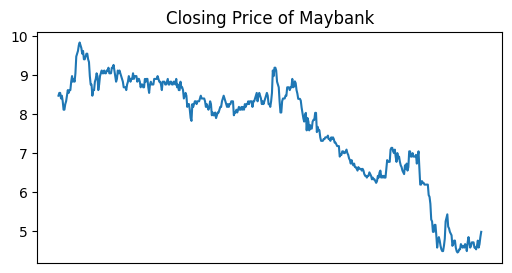

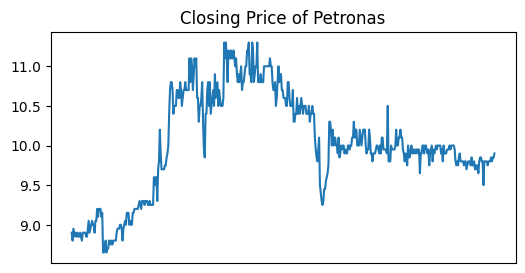

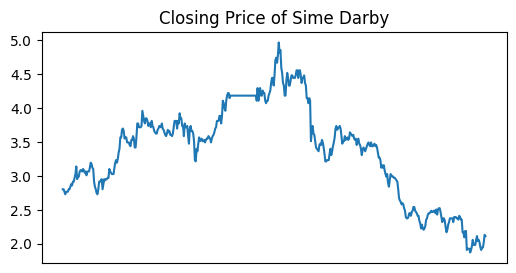

In [16]:
fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Maybank')
plt.plot(Days, CloseMaybank)
fig.set_size_inches(6, 3)
plt.show()

fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Petronas')
plt.plot(Days, ClosePetronas)
fig.set_size_inches(6, 3)
plt.show()


fig,ax = plt.subplots(1)
ax.set_xticks([])
plt.title('Closing Price of Sime Darby')
plt.plot(Days, CloseSimeDarby)
fig.set_size_inches(6, 3)
plt.show()

# Results

# Set A

### Search for optimum ξ-value and Mahalanobis Universal Portfolio at final trading day on Set A

Wealth generated at ξ graph


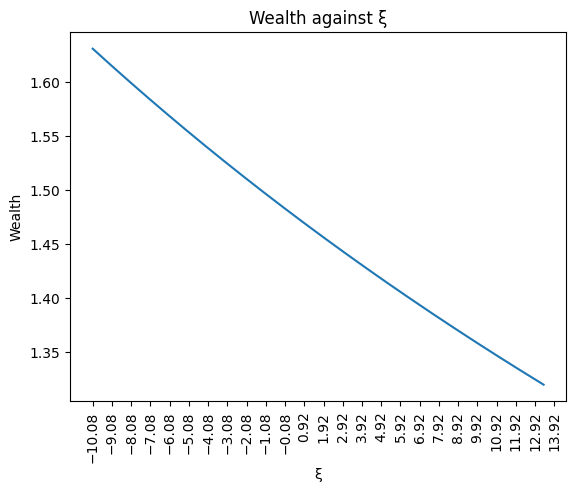

Optimum ξ-value
-10.08 

Mahalanobis Universal Portfolio at final trading day and at optimum ξ-value
 b1 =  0.45611355863838093 
 b2 =  0.2933717287631181 
 b3 =  0.2505147125983606


In [17]:
#Plot graph
print('\033[4m' + 'Wealth generated at ξ graph' + '\033[0m')  

Range = np.arange(-10.08, 13.37, 0.01)
Wealth = np.array([])
for ξ in Range:
   Wealth = np.append(Wealth, Wealth_MUP(ξ, ratioSetA))

ξ = Range
w = Wealth

plt.xlabel('ξ')
plt.ylabel('Wealth')
plt.title('Wealth against ξ')
plt.plot(ξ, w)
plt.xticks(np.arange(min(ξ), max(ξ)+1, 1),rotation=90)
plt.show()

#Optimum ξ-value
print('\033[4m' + 'Optimum ξ-value' + '\033[0m')
print(ξ[np.argmax(w)], '\n')

#Final Mahalanobis Universal Portfolio
print('\033[4m' + 'Mahalanobis Universal Portfolio at final trading day and at optimum ξ-value' + '\033[0m')  
print(' b1 = ', Portfolio(ξ[np.argmax(w)], ratioSetA)[500][0], '\n', 
      'b2 = ', Portfolio(ξ[np.argmax(w)], ratioSetA)[500][1], '\n',
      'b3 = ', Portfolio(ξ[np.argmax(w)], ratioSetA)[500][2])

### Wealth generated by different trading strategies on Set A

In [18]:
print('\033[4m' + 'Mahalanobis Universal Portfolio' + '\033[0m') 
print('Wealth generated : ', w.max())
print('Percentage       : ', percentage(w.max()), '% \n')


print('\033[4m' + 'Constant Rebalanced Portfolio' + '\033[0m')
print('Wealth generated : ', Wealth_CRP(np.array([1/3, 1/3, 1/3]), ratioSetA))
print('Percentage       : ', percentage(Wealth_CRP(np.array([1/3, 1/3, 1/3]), ratioSetA)), '% \n')

print('\033[4m' + 'Best Constant Rebalanced Portfolio' + '\033[0m')      
print('Wealth generated : ', Wealth_CRP(BCRP(ratioSetA), ratioSetA))
print('Percentage       : ', percentage(Wealth_CRP(BCRP(ratioSetA), ratioSetA)), '% \n')

print('\033[4m' + 'Buy-and-Hold' + '\033[0m')
print('CIMB') 
print('Wealth generated : ', BHS(CloseCIMB))
print('Percentage       : ', percentage(BHS(CloseCIMB)), '% \n')

print('Petron')
print('Wealth generated : ', BHS(ClosePetron))
print('Percentage       : ', percentage(BHS(ClosePetron)), '% \n')

print('YTL')
print('Wealth generated : ', BHS(CloseYTL))
print('Percentage       : ', percentage(BHS(CloseYTL)), '% \n')

Mahalanobis Universal Portfolio
Wealth generated :  1.6307497765030823
Percentage       :  63.07497765030823 % 

Constant Rebalanced Portfolio
Wealth generated :  1.481438787467457
Percentage       :  48.143878746745706 % 

Best Constant Rebalanced Portfolio
Wealth generated :  2.043822274332303
Percentage       :  104.38222743323031 % 

Buy-and-Hold
CIMB
Wealth generated :  0.8227848101265822
Percentage       :  -17.721518987341778 % 

Petron
Wealth generated :  0.695364238410596
Percentage       :  -30.4635761589404 % 

YTL
Wealth generated :  1.1202398420311888
Percentage       :  12.023984203118875 % 



## Set B

### Search for optimum ξ-value and Mahalanobis Universal Portfolio at final trading day on Set B

Wealth generated at ξ graph


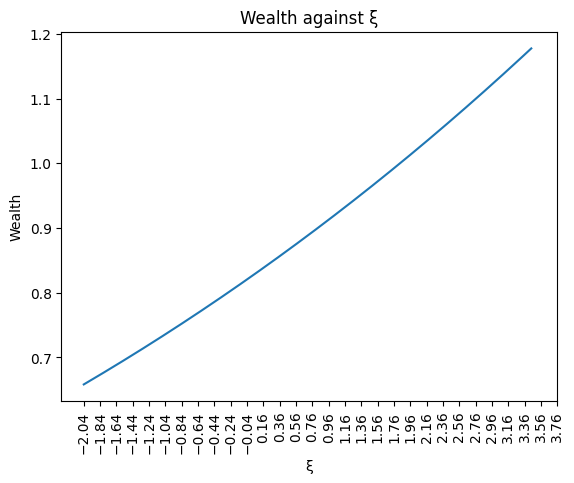

Optimum ξ-value
3.439999999999883 

Mahalanobis Universal Portfolio at final trading day and at optimum ξ-value
 b1 =  0.8128187389639439 
 b2 =  0.14752207237806553 
 b3 =  0.039659188658039565


In [19]:
#Plot graph
print('\033[4m' + 'Wealth generated at ξ graph' + '\033[0m')  

Range = np.arange(-2.04, 3.45, 0.01)
Wealth = np.array([])
for ξ in Range:
   Wealth = np.append(Wealth, Wealth_MUP(ξ, ratioSetB))

ξ = Range
w = Wealth

plt.xlabel('ξ')
plt.ylabel('Wealth')
plt.title('Wealth against ξ')
plt.plot(ξ, w)
plt.xticks(np.arange(min(ξ), max(ξ)+0.5, 0.2),rotation=90)
plt.show()

#Optimum ξ-value
print('\033[4m' + 'Optimum ξ-value' + '\033[0m')
print(ξ[np.argmax(w)], '\n')

#Final Mahalanobis Universal Portfolio
print('\033[4m' + 'Mahalanobis Universal Portfolio at final trading day and at optimum ξ-value' + '\033[0m')  
print(' b1 = ', Portfolio(ξ[np.argmax(w)], ratioSetB)[500][0], '\n', 
      'b2 = ', Portfolio(ξ[np.argmax(w)], ratioSetB)[500][1], '\n',
      'b3 = ', Portfolio(ξ[np.argmax(w)], ratioSetB)[500][2])

### Wealth generated by different trading strategies on Set B

In [20]:
print('\033[4m' + 'Mahalanobis Universal Portfolio' + '\033[0m') 
print('Wealth generated : ', w.max())
print('Percentage       : ', percentage(w.max()), '% \n')


print('\033[4m' + 'Constant Rebalanced Portfolio' + '\033[0m')
print('Wealth generated : ', Wealth_CRP(np.array([1/3, 1/3, 1/3]), ratioSetB))
print('Percentage       : ', percentage(Wealth_CRP(np.array([1/3, 1/3, 1/3]), ratioSetB)), '% \n')

print('\033[4m' + 'Best Constant Rebalanced Portfolio' + '\033[0m')      
print('Wealth generated : ', Wealth_CRP(BCRP(ratioSetB), ratioSetB))
print('Percentage       : ', percentage(Wealth_CRP(BCRP(ratioSetB), ratioSetB)), '% \n')

print('\033[4m' + 'Buy-and-Hold' + '\033[0m')
print('Public Bank') 
print('Wealth generated : ', BHS(ClosePublicBank))
print('Percentage       : ', percentage(BHS(ClosePublicBank)), '% \n')

print('Shell')
print('Wealth generated : ', BHS(CloseShell))
print('Percentage       : ', percentage(BHS(CloseShell)), '% \n')

print('Top Glove')
print('Wealth generated : ', BHS(CloseTopGlove))
print('Percentage       : ', percentage(BHS(CloseTopGlove)), '% \n')

Mahalanobis Universal Portfolio
Wealth generated :  1.1775640205290425
Percentage       :  17.756402052904253 % 

Constant Rebalanced Portfolio
Wealth generated :  0.8240567513330703
Percentage       :  -17.59432486669297 % 

Best Constant Rebalanced Portfolio
Wealth generated :  2.0710364833940296
Percentage       :  107.10364833940295 % 

Buy-and-Hold
Public Bank
Wealth generated :  1.1282050355370163
Percentage       :  12.820503553701634 % 

Shell
Wealth generated :  0.7325498523383912
Percentage       :  -26.745014766160878 % 

Top Glove
Wealth generated :  0.4078263706618231
Percentage       :  -59.2173629338177 % 



### Data Set C

### Search for optimum ξ-value and Mahalanobis Universal Portfolio at final trading day on Set C

Wealth generated at ξ graph


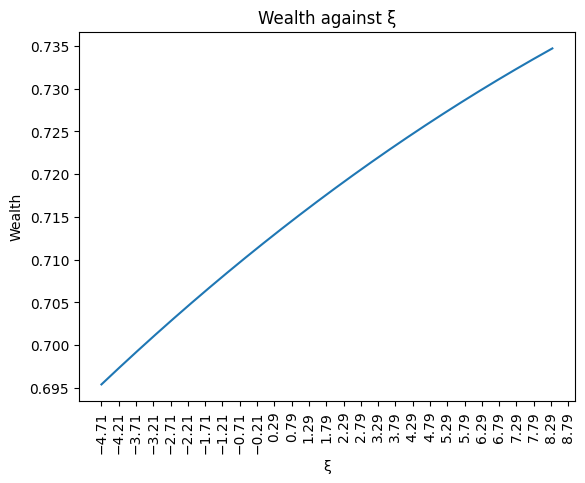

Optimum ξ-value
8.329999999999721 

Mahalanobis Universal Portfolio at final trading day and at optimum ξ-value
 b1 =  0.6931455544057368 
 b2 =  0.17692054638455748 
 b3 =  0.12993389920981832


In [21]:
#Plot graph
print('\033[4m' + 'Wealth generated at ξ graph' + '\033[0m')  

Range = np.arange(-4.71, 8.34, 0.01)
Wealth = np.array([])
for ξ in Range:
   Wealth = np.append(Wealth, Wealth_MUP(ξ, ratioSetC))

ξ = Range
w = Wealth

plt.xlabel('ξ')
plt.ylabel('Wealth')
plt.title('Wealth against ξ')
plt.plot(ξ, w)
plt.xticks(np.arange(min(ξ), max(ξ)+0.5, 0.5),rotation=90)
plt.show()

#Optimum ξ-value
print('\033[4m' + 'Optimum ξ-value' + '\033[0m')
print(ξ[np.argmax(w)], '\n')

#Final Mahalanobis Universal Portfolio
print('\033[4m' + 'Mahalanobis Universal Portfolio at final trading day and at optimum ξ-value' + '\033[0m')  
print(' b1 = ', Portfolio(ξ[np.argmax(w)], ratioSetC)[500][0], '\n', 
      'b2 = ', Portfolio(ξ[np.argmax(w)], ratioSetC)[500][1], '\n',
      'b3 = ', Portfolio(ξ[np.argmax(w)], ratioSetC)[500][2])

### Wealth generated by different trading strategies on Set C

In [22]:
print('\033[4m' + 'Mahalanobis Universal Portfolio' + '\033[0m') 
print('Wealth generated : ', w.max())
print('Percentage       : ', percentage(w.max()), '% \n')


print('\033[4m' + 'Constant Rebalanced Portfolio' + '\033[0m')
print('Wealth generated : ', Wealth_CRP(np.array([1/3, 1/3, 1/3]), ratioSetC))
print('Percentage       : ', percentage(Wealth_CRP(np.array([1/3, 1/3, 1/3]), ratioSetC)), '% \n')

print('\033[4m' + 'Best Constant Rebalanced Portfolio' + '\033[0m')      
print('Wealth generated : ', Wealth_CRP(BCRP(ratioSetC), ratioSetC))
print('Percentage       : ', percentage(Wealth_CRP(BCRP(ratioSetC), ratioSetC)), '% \n')

print('\033[4m' + 'Buy-and-Hold' + '\033[0m')
print('Maybank') 
print('Wealth generated : ', BHS(CloseMaybank))
print('Percentage       : ', percentage(BHS(CloseMaybank)), '% \n')

print('Petronas')
print('Wealth generated : ', BHS(ClosePetronas))
print('Percentage       : ', percentage(BHS(ClosePetronas)), '% \n')

print('Sime Darby')
print('Wealth generated : ', BHS(CloseSimeDarby))
print('Percentage       : ', percentage(BHS(CloseSimeDarby)), '% \n')

Mahalanobis Universal Portfolio
Wealth generated :  0.7347011865683777
Percentage       :  -26.52988134316223 % 

Constant Rebalanced Portfolio
Wealth generated :  0.7120107624593273
Percentage       :  -28.798923754067275 % 

Best Constant Rebalanced Portfolio
Wealth generated :  1.0305619558013184
Percentage       :  3.0561955801318375 % 

Buy-and-Hold
Maybank
Wealth generated :  0.587923768048588
Percentage       :  -41.207623195141196 % 

Petronas
Wealth generated :  1.1123595505617978
Percentage       :  11.23595505617978 % 

Sime Darby
Wealth generated :  0.75333305020355
Percentage       :  -24.666694979644998 % 

